<a href="https://colab.research.google.com/github/blackgreenc/AI/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84%EC%98%81%ED%99%94_%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%B0%8F_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_(%ED%95%99%EC%83%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. 한글 설정을 위해 필요한 것들 설치

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,832 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

##2. 라이브러리 불러오기

In [45]:
#pandas 라이브러리 import
import pandas as pd #데이터분석

#matplotlib 라이브러리 import
import matplotlib.pyplot as plt #데이터시각화

#urlopen 라이브러리 import  #웹크롤링
from urllib.request import urlopen

#BeautifulSoup 라이브러리 import
from bs4 import BeautifulSoup 

In [101]:
#numpy import #?
import numpy as np #?
print(np.__version__) #?

1.19.5


## 3. 한글 설정하기 (matplotlib 라이브러리 사용)

In [3]:
plt.rc('font', family='NanumBarunGothic')

## 4. 네이버 영화 크롤링하기 + csv 파일 저장
- (총 6개) 영화 제목, 링크, 평점, 참여자 수, 장르(여러 개일 경우 가장 앞에 꺼 하나만), 연령대 

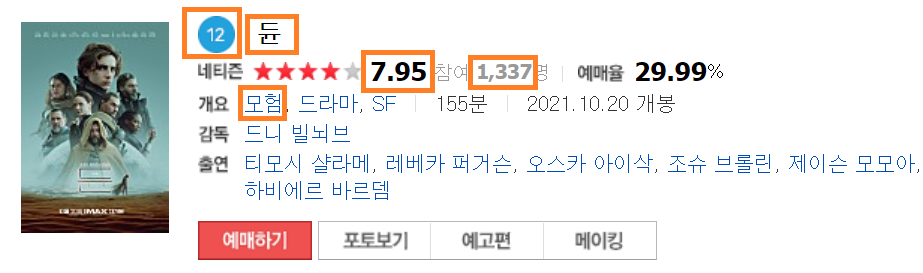

### 크롤링
- 웹 사이트의 내용에 접근하여 원하는 정보를 추출해 내는 행위
- 크롬(chrome)으로 실습 진행
1. 라이브러리 불러오기 + 해당 웹 페이지 주소 접근
2. urlopen(), BeautifulSoup() 라이브러리 사용해서 해당 웹 페이지의 html 코드 가져오기
3. find(), find_all(), select_one, select 사용해서 원하는 데이터가 들어있는 html 코드 일부를 가져오기
4. 웹 페이지에 보여지는 본문 내용을 가져오고 싶다면 .text 사용
5. html 코드 안에 들어 있는 속성 값을 가져오고 싶다면 .get('속성이름') 사용

###1) html 문서 불러오기

In [4]:
url = 'https://movie.naver.com/movie/running/current.naver'
res = urlopen(url)
soup = BeautifulSoup(res, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="no" http-equiv="imagetoolbar"/>
  <title>
   현재 상영영화 : 네이버 영화
  </title>
  <meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="me2:image"/>
  <meta content="네이버영화 현재상영작" property="me2:post_tag"/>
  <meta content="네이버영화" property="me2:category1"/>
  <meta content="현재상영작" property="me2:category2"/>
  <meta content="현재상영작 : 네이버 영화" property="og:title"/>
  <meta content="article" property="og:type"/>
  <meta content="https://movie.naver.com/movie/running/current.naver" property="og:url"/>
  <meta content="https://ssl.pstatic.net/static/m/movie/icons/OG_270_270.png" property="og:image"/>
  <meta content="상영 중 영화의 예매율/평점/좋아요 순 정보 제공." property="og:description"/>
  <meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
  <meta content="네이버 영화" proper

###2) 영화 제목 + 링크 데이터 가져오기

In [5]:
movie_name = []       #영화 제목
movie_info = []       #영화 링크
title = soup.select('#content > div.article > div:nth-of-type(1) > div.lst_wrap > ul > li > dl > dt > a')
title

for i in title:
  movie_name.append(i.text)
  movie_info.append(i.get('href'))
  
 # 리스트 개수 세기
print(len(movie_name), len(movie_info))

122 122


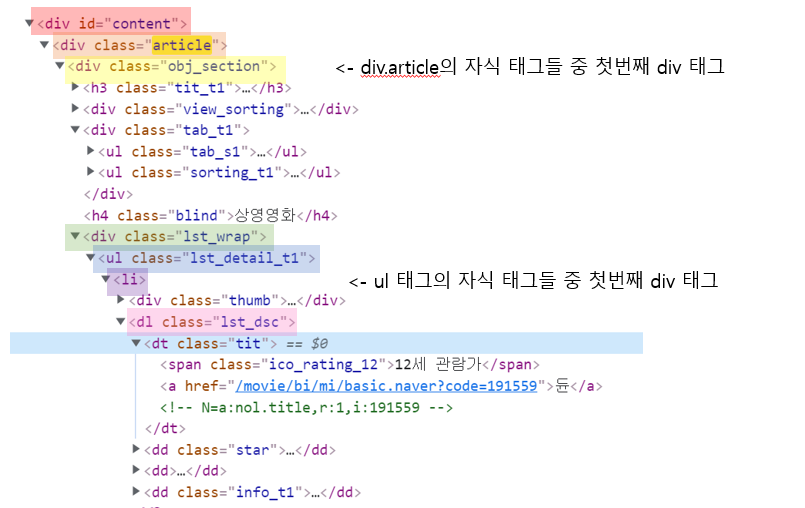

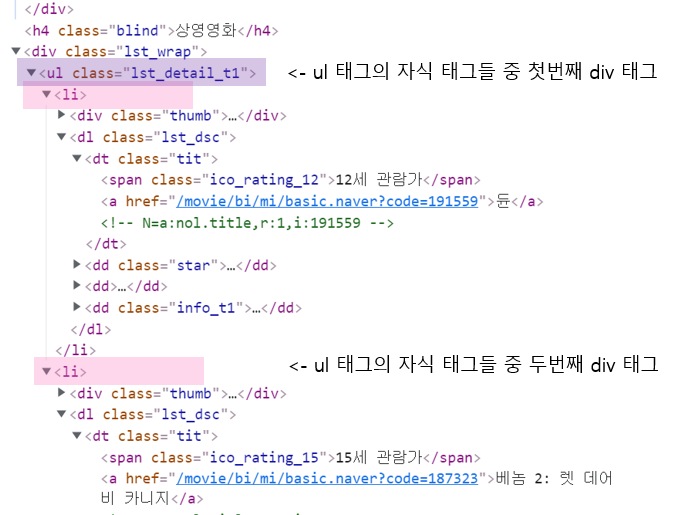

### 3) 영화 평점 데이터 가져오기

In [6]:
movie_score=[]      
score = soup.select('#content > div.article > div:nth-of-type(1) > div.lst_wrap > ul > li > dl > dd.star > dl.info_star > dd > div > a > span.num')

score

for i in score:
  movie_score.append(i.text)

print(len(movie_score))



122


### 4) 영화 투표수 데이터 가져오기

In [7]:
movie_vote = []      #평점
vote = soup.select('#content > div.article > div:nth-of-type(1) > div.lst_wrap > ul > li > dl > dd.star > dl.info_star > dd > div > a > span.num2 > em')

vote

for i in vote:
  movie_vote.append(i.text)

print(len(movie_vote))




122


### 5) 영화 장르 데이터 가져오기

In [8]:
movie_genre = []      #평점
genre = soup.select('#content > div.article > div:nth-of-type(1) > div.lst_wrap > ul > li > dl > dd:nth-of-type(2) > dl > dd:nth-of-type(1) > span.link_txt > a:nth-of-type(1)')

genre

for i in genre:
  movie_genre.append(i.text)
  
print(len(movie_genre))




118


#### 데이터가 없음 -> 문제 확인하기

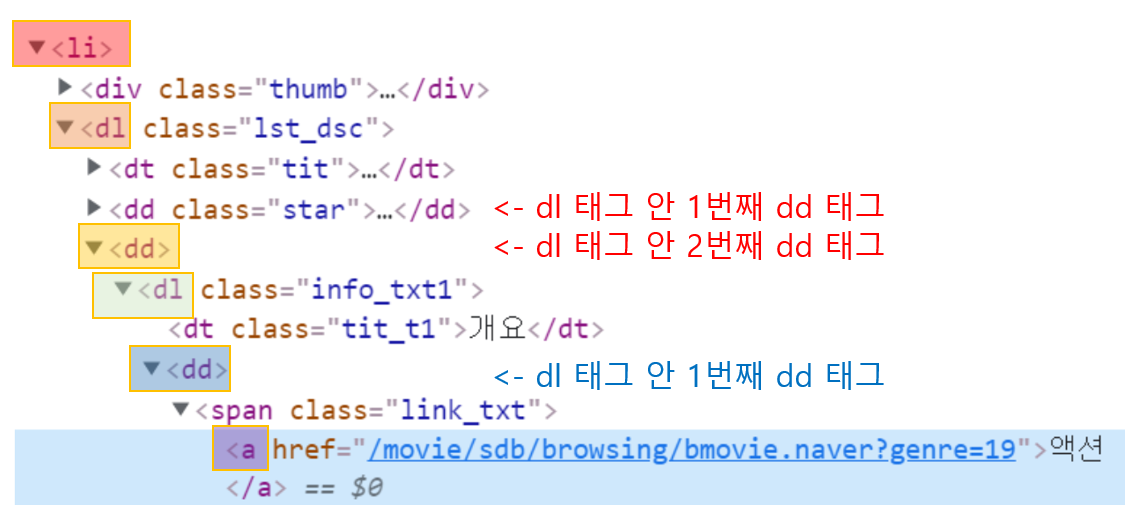

#### 문제 원인 확인 후, 코드 재작성

#### null값 여부 확인하기

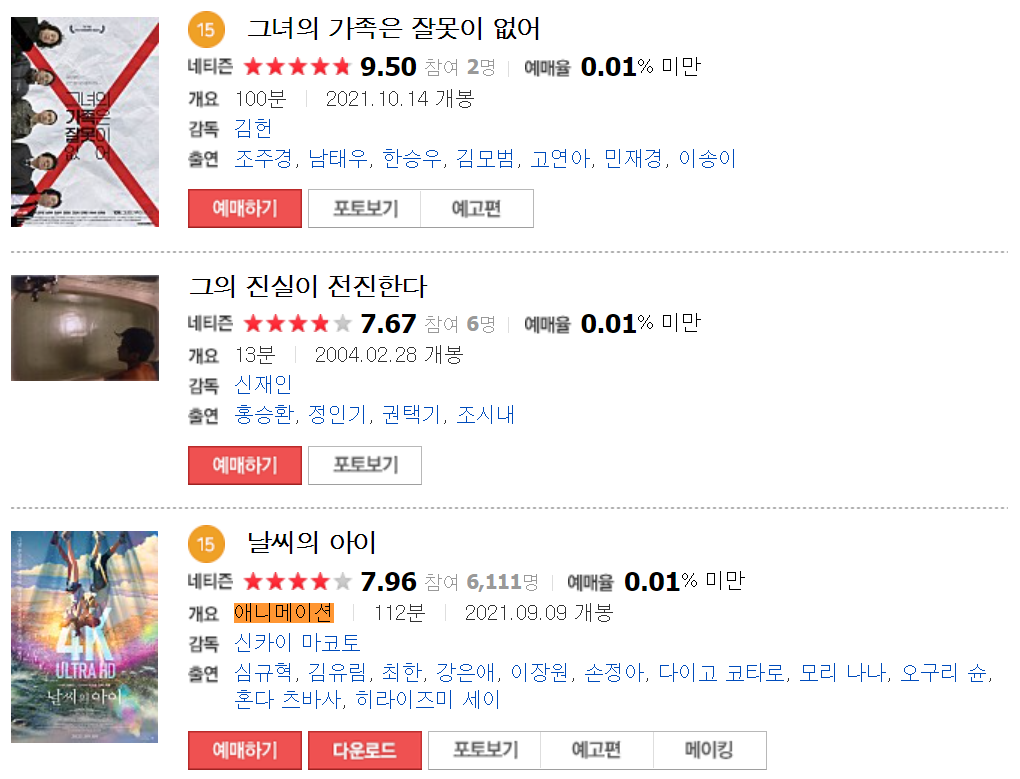

- 파이썬 문법

In [9]:
genre = '드라마'
print(f'이 영화 장르는 {genre}이다')

이 영화 장르는 드라마이다


In [10]:
for i in range(len(title)):
  i = i+1
  genre = soup.select_one(f'div.lst_wrap > ul > li:nth-of-type({i}) > dl > dd:nth-of-type(2) > dl > dd:nth-of-type(1) > span.link_txt > a:nth-of-type(1)')
  print(genre)

<a href="/movie/sdb/browsing/bmovie.naver?genre=15">애니메이션</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=6">모험</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=19">액션</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=1">드라마</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=19">액션</a>
None
<a href="/movie/sdb/browsing/bmovie.naver?genre=19">액션</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=1">드라마</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=1">드라마</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=4">공포</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=1">드라마</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=10">다큐멘터리</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=1">드라마</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=15">애니메이션</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=1">드라마</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=11">코미디</a>
<a href="/movie/sdb/browsing/bmovie.naver?genre=1">드라마</a>
<a href="/movie/sdb/browsing/bmovie.naver?g

#### 장르 데이터 중 null값은 'None' 데이터 넣어주기 

- if~else문 사용

In [11]:
a = -5
if(a):
  print(a)
else:
  print(a-5)

-5


- 적용

In [12]:
movie_genre = []

for i in range(len(title)):
  i = i+1
  genre = soup.select_one(f'div.lst_wrap > ul > li:nth-of-type({i}) > dl > dd:nth-of-type(2) > dl > dd:nth-of-type(1) > span.link_txt > a:nth-of-type(1)')

  if(genre):
    movie_genre.append(genre.text)
  else:
    movie_genre.append('None')

print(len(movie_genre))

122


### 6) 영화 연령대 데이터 가져오기

In [13]:
movie_age = []

for i in range(len(title)):
  i = i+1
  age = soup.select_one(f'#content > div.article > div:nth-of-type(1) > div.lst_wrap > ul > li:nth-of-type({i}) > dl > dt > span')

  if(age):
    movie_age.append(age.text)
  else:
    movie_age.append('None')

print(len(movie_age))







122


### 7) 최종 확인

In [14]:
print(len(movie_name), len(movie_genre), len(movie_score), len(movie_vote), len(movie_age), len(movie_info))

122 122 122 122 122 122


## pandas를 활용한 DataFrame 만들기

In [15]:
#직접 해보기
movie = pd.DataFrame({'name' : movie_name, 'genre' : movie_genre, 'age' : movie_age,
                      'score' : movie_score, 'vote' : movie_vote, 'info' : movie_info})
movie

,name,genre,age,score,vote,info
0,고장난 론,애니메이션,전체 관람가,9.25,313,/movie/bi/mi/basic.naver?code=209496
1,듄,모험,12세 관람가,7.77,"3,875",/movie/bi/mi/basic.naver?code=191559
2,베놈 2: 렛 데어 비 카니지,액션,15세 관람가,6.10,"3,274",/movie/bi/mi/basic.naver?code=187323
3,아네트,드라마,15세 관람가,7.35,150,/movie/bi/mi/basic.naver?code=206657
4,라스트 듀얼: 최후의 결투,액션,청소년 관람불가,9.11,667,/movie/bi/mi/basic.naver?code=191545
...,...,...,...,...,...,...
117,라라랜드,드라마,12세 관람가,8.62,"24,671",/movie/bi/mi/basic.naver?code=134963
118,마티아스와 막심,드라마,15세 관람가,8.37,144,/movie/bi/mi/basic.naver?code=185273
119,미스 사이공: 25주년 특별 공연,공연실황,15세 관람가,9.22,281,/movie/bi/mi/basic.naver?code=155123
120,비긴 어게인,드라마,15세 관람가,9.04,"18,175",/movie/bi/mi/basic.naver?code=96379


## movie 데이터 살펴보기

In [16]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    122 non-null    object
 1   genre   122 non-null    object
 2   age     122 non-null    object
 3   score   122 non-null    object
 4   vote    122 non-null    object
 5   info    122 non-null    object
dtypes: object(6)
memory usage: 5.8+ KB


## genre가 'None'인 데이터 찾기

- genre 데이터 가져오기

In [17]:
movie['genre']

0      애니메이션
1         모험
2         액션
3        드라마
4         액션
       ...  
117      드라마
118      드라마
119     공연실황
120      드라마
121       액션
Name: genre, Length: 122, dtype: object

 - 값이 'None'인 것 찾기

In [18]:
movie[movie ['genre'] == 'None']

,name,genre,age,score,vote,info
5,그의 진실이 전진한다,None,None,6.71,7,/movie/bi/mi/basic.naver?code=36125
37,생산적 활동,None,None,6.12,24,/movie/bi/mi/basic.naver?code=37221
78,그녀의 가족은 잘못이 없어,None,15세 관람가,9.50,2,/movie/bi/mi/basic.naver?code=174258
109,인트로덕션,None,12세 관람가,7.49,104,/movie/bi/mi/basic.naver?code=202541


##age가 'None'인 것 찾기

In [19]:
movie [movie ['age'] == 'None']

,name,genre,age,score,vote,info
5,그의 진실이 전진한다,None,None,6.71,7,/movie/bi/mi/basic.naver?code=36125
10,독일 영년,드라마,None,9.00,21,/movie/bi/mi/basic.naver?code=13762
37,생산적 활동,None,None,6.12,24,/movie/bi/mi/basic.naver?code=37221


## 연령대 비율 시각화하기

In [20]:
set(movie['age'])

{'12세 관람가', '15세 관람가', 'None', '전체 관람가', '청소년 관람불가'}

###1) value_counts() : 각각의 value가 몇 개 있는지 확인(데이터 분포도)
- 가장 많은 데이터부터 내림차순으로 보여줌

In [21]:
movie.value_counts('age')

age
12세 관람가     50
15세 관람가     37
전체 관람가      21
청소년 관람불가    11
None         3
dtype: int64

### 2) index와 values 값 확인

In [22]:
data = movie.value_counts('age').values
index = movie.value_counts('age').index

print(data)
print(index)

[50 37 21 11  3]
Index(['12세 관람가', '15세 관람가', '전체 관람가', '청소년 관람불가', 'None'], dtype='object', name='age')


###3) bar 그래프 그리기

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

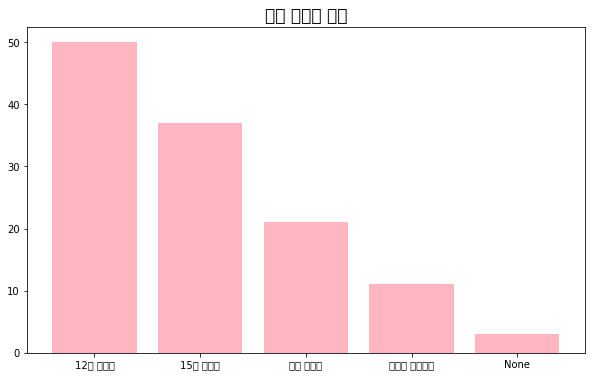

In [23]:
# 직접 해보기

plt. figure(figsize = (10, 6))
plt. bar (index, data, color = 'lightpink')
plt. title ('영화 연령대 비율', size = 17)
plt.show()






- 참고 (색깔 종류)

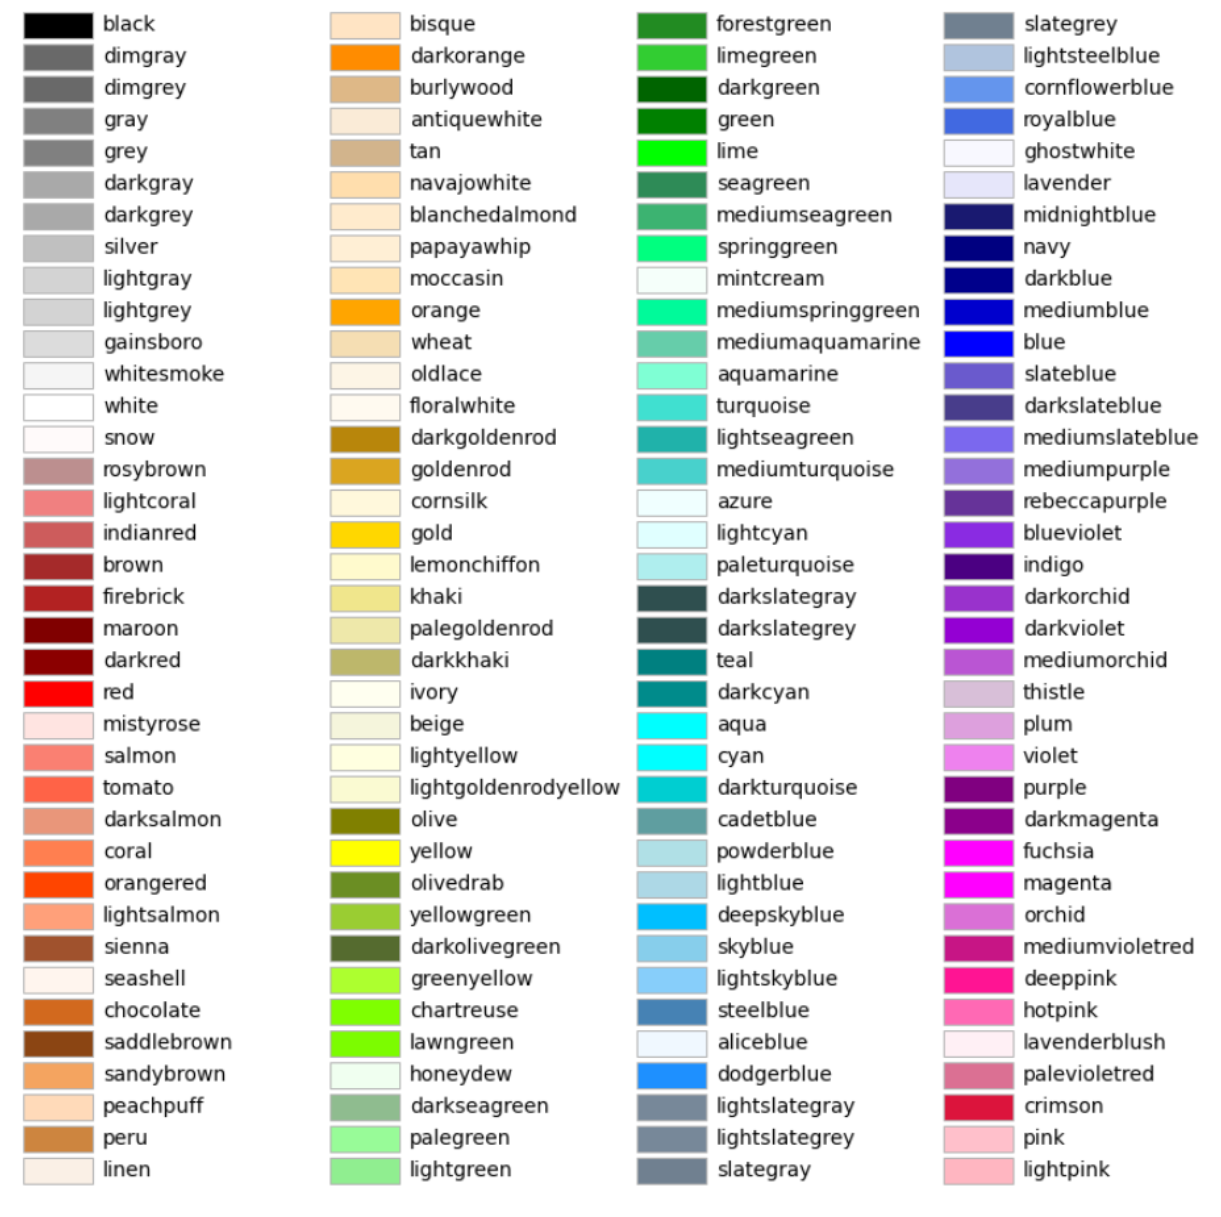

###4) pie 차트 그리기

- pie 차트 : 범주별 구성 비율을 원형으로 표현한 그래프
- 부채꼴의 중심각을 구성 비율에 비례하도록 표현

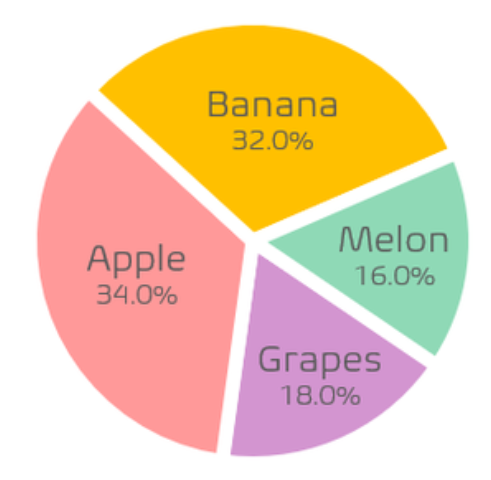

In [24]:
plt.pie?

In [25]:
data = movie.value_counts('age').values
index = movie.value_counts('age').index

print(data)
print(index)

[50 37 21 11  3]
Index(['12세 관람가', '15세 관람가', '전체 관람가', '청소년 관람불가', 'None'], dtype='object', name='age')


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

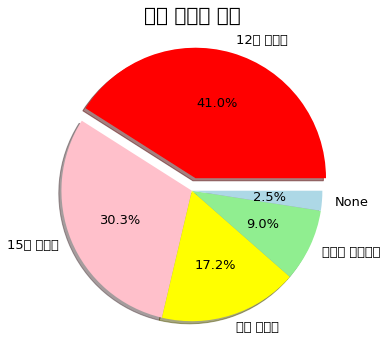

In [26]:
plt.figure(figsize = (10, 6))

explode = (0.1, 0, 0, 0, 0)
colors = ['red', 'pink', 'yellow', 'lightgreen', 'lightblue']

# autopct : 부채꼴 안에 표시될 숫자의 형식을 지정
# explode : 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정
# shadow : True로 설정하면, 파이 차트에 그림자가 표시
# colors : 각 영역의 색상을 자유롭게 지정

plt.pie(data, labels = index, autopct='%.1f%%', explode=explode, 
        shadow=True, textprops = {'fontsize' : 13}, colors=colors)

plt.title('영화 연령대 비율', fontsize=20)
plt.show()

## <과제> 영화 장르 비율 pie 차트로 시각화하기 
- 조건 : 가장 비율이 높은 상위 10개 장르만 나타낸다.
- 예시 


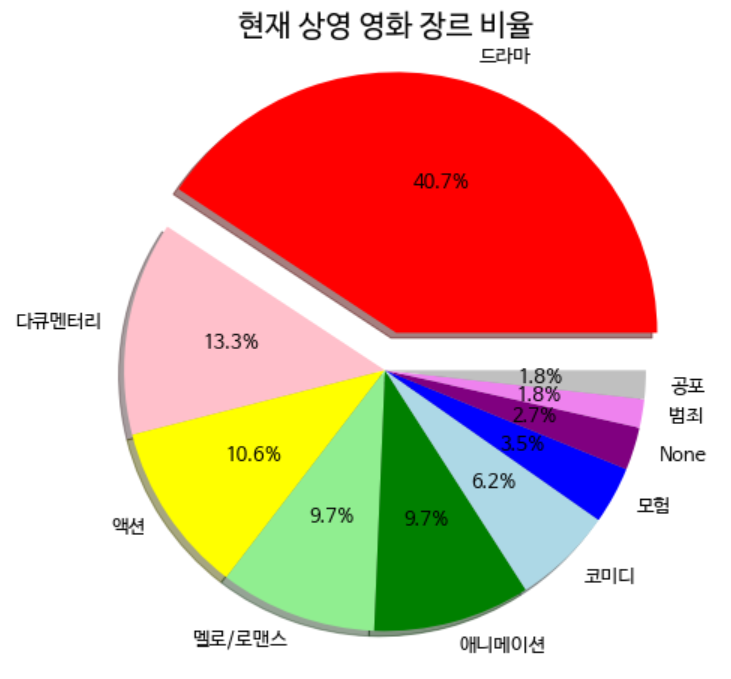

###1) value_counts() : 각각의 value가 몇 개 있는지 확인(데이터 분포도)
- 가장 많은 데이터부터 내림차순으로 보여줌

In [27]:
#직접 해보기
movie.value_counts('genre')

genre
드라마       49
애니메이션     14
다큐멘터리     12
액션        11
멜로/로맨스    11
코미디        6
None       4
범죄         3
공포         3
스릴러        2
모험         2
SF         2
판타지        1
서스펜스       1
공연실황       1
dtype: int64

### 2) index와 values 값 확인

In [28]:
#직접 해보기

index = movie.value_counts('genre').index

print(index)



Index(['드라마', '애니메이션', '다큐멘터리', '액션', '멜로/로맨스', '코미디', 'None', '범죄', '공포',
       '스릴러', '모험', 'SF', '판타지', '서스펜스', '공연실황'],
      dtype='object', name='genre')


In [29]:
#직접 해보기
data = movie.value_counts('genre').values

print(data)

[49 14 12 11 11  6  4  3  3  2  2  2  1  1  1]


### 3) 상위 10개 데이터(index, values)만 가져오기 

In [30]:
#직접 해보기

data[0:10]


array([49, 14, 12, 11, 11,  6,  4,  3,  3,  2])

In [31]:
index[0:10]

Index(['드라마', '애니메이션', '다큐멘터리', '액션', '멜로/로맨스', '코미디', 'None', '범죄', '공포',
       '스릴러'],
      dtype='object', name='genre')

### 4) 차트 시각화하기

In [32]:
#직접 해보기




# 평점이 높은 영화 10위까지 찾기

In [33]:
movie.head()

,name,genre,age,score,vote,info
0,고장난 론,애니메이션,전체 관람가,9.25,313,/movie/bi/mi/basic.naver?code=209496
1,듄,모험,12세 관람가,7.77,"3,875",/movie/bi/mi/basic.naver?code=191559
2,베놈 2: 렛 데어 비 카니지,액션,15세 관람가,6.10,"3,274",/movie/bi/mi/basic.naver?code=187323
3,아네트,드라마,15세 관람가,7.35,150,/movie/bi/mi/basic.naver?code=206657
4,라스트 듀얼: 최후의 결투,액션,청소년 관람불가,9.11,667,/movie/bi/mi/basic.naver?code=191545


### 1) 'score' 칼럼을 기준으로 내림차순 정렬하여 상위 5줄 나타내기

In [34]:
#직접 해보기

movie.sort_values(by='score', ascending=False).head()



,name,genre,age,score,vote,info
46,바람아 안개를 걷어가다오,드라마,12세 관람가,9.90,10,/movie/bi/mi/basic.naver?code=193044
53,울림의 탄생,다큐멘터리,전체 관람가,9.75,8,/movie/bi/mi/basic.naver?code=197069
99,샤먼 로드,다큐멘터리,12세 관람가,9.58,19,/movie/bi/mi/basic.naver?code=178267
78,그녀의 가족은 잘못이 없어,None,15세 관람가,9.50,2,/movie/bi/mi/basic.naver?code=174258
95,몽마르트 파파,다큐멘터리,전체 관람가,9.46,169,/movie/bi/mi/basic.naver?code=189463


- 투표 수가 적은 영화가 평점이 더 높음 -> 평가 방법을 평가 횟수에 대한 가중치를 부여된 평점 방식으로 바꾸기

### 2) 평가 횟수에 대한 가중치를 부여된 평점 방식 구하기

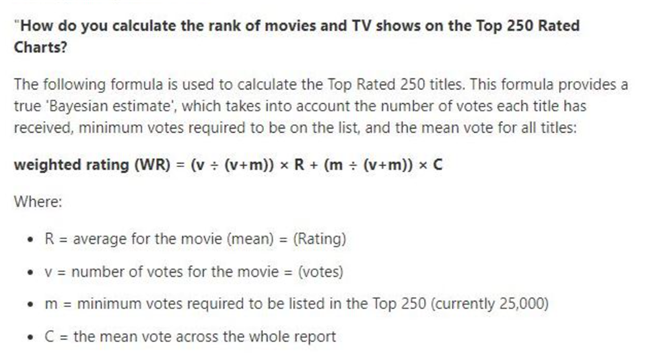

- v : 개별 영화에 평가를 매긴 횟수
- m : 평점을 부여하기 위한 최소 평가 수
- R : 개별 영화의 평균 평점
- C : 전체 영화의 평균 평점

In [98]:
#movie['vote'].describe() #?
a = movie['vote'].quantile(0.6)#?
print(a)#?
type(movie['score'])#?
n = movie['score'].mean#?
print(n)#?

256.79999999999984
<bound method Series.mean of 0      9.25
1      7.77
2      6.10
3      7.35
4      9.11
       ... 
117    8.62
118    8.37
119    9.22
120    9.04
121    8.30
Name: score, Length: 122, dtype: object>


In [99]:
n = movie['score'].mean#?
print(n)#?

<bound method Series.mean of 0      9.25
1      7.77
2      6.10
3      7.35
4      9.11
       ... 
117    8.62
118    8.37
119    9.22
120    9.04
121    8.30
Name: score, Length: 122, dtype: object>


In [102]:
percentile = 0.6

v = movie['vote']  # 개별 영화에 평가를 매긴 횟수
m = movie['vote'].quantile(0.6)  # 평점을 부여하기 위한 최소 평가 수
R = movie['score']  # 개별 영화의 평균 평점
C = movie['score'].mean()  # 전체 영화의 평균 평점

movie['weighted_vote'] = ( (v/(v+m)) * R ) + ( (m/(m+v)) * C )  # 가중 평점 계산 식
movie.head()

TypeError: ignored

###3) 오류 수정 
- 'vote’칼럼을 int형으로 변경하기
- 'score'칼럼을 float형으로 변경하기

- 수정 전

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    122 non-null    object
 1   genre   122 non-null    object
 2   age     122 non-null    object
 3   score   122 non-null    object
 4   vote    122 non-null    object
 5   info    122 non-null    object
dtypes: object(6)
memory usage: 5.8+ KB


In [41]:
#movie["vote"] = movie["vote"].replace(',','')
#movie.head()
movie['vote'] = movie['vote'].str.replace(',', '')
movie.head()


,name,genre,age,score,vote,info
0,고장난 론,애니메이션,전체 관람가,9.25,313,/movie/bi/mi/basic.naver?code=209496
1,듄,모험,12세 관람가,7.77,3875,/movie/bi/mi/basic.naver?code=191559
2,베놈 2: 렛 데어 비 카니지,액션,15세 관람가,6.10,3274,/movie/bi/mi/basic.naver?code=187323
3,아네트,드라마,15세 관람가,7.35,150,/movie/bi/mi/basic.naver?code=206657
4,라스트 듀얼: 최후의 결투,액션,청소년 관람불가,9.11,667,/movie/bi/mi/basic.naver?code=191545


In [42]:
movie["vote"] = movie["vote"].astype(int)

In [103]:
movie["score"] = movie["score"].astype(float)
movie['score'].mean()

7.780901639344262

- 수정 후

In [112]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           122 non-null    object 
 1   genre          122 non-null    object 
 2   age            122 non-null    object 
 3   score          122 non-null    float64
 4   vote           122 non-null    int64  
 5   info           122 non-null    object 
 6   weighted_vote  122 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.8+ KB


In [113]:
percentile = 0.6 # 데이터를 100 등분하는 지점을 의미. 보통 흔히 상위 몇%라고 말할때 주로 사용

v = movie['vote']  # 개별 영화에 평가를 매긴 횟수
m = movie['vote'].quantile(percentile)  # 평점을 부여하기 위한 최소 평가 수 , quantile은 주어진 데이터를 동등한 크기로 분할하는 지점을 의미
R = movie['score']  # 개별 영화의 평균 평점
C = movie['score'].mean()  # 전체 영화의 평균 평점

movie['weighted_vote'] = ( (v/(v+m)) * R ) + ( (m/(m+v)) * C )  # 가중 평점 계산 식
movie.head()

,name,genre,age,score,vote,info,weighted_vote
0,고장난 론,애니메이션,전체 관람가,9.25,313,/movie/bi/mi/basic.naver?code=209496,8.587900
1,듄,모험,12세 관람가,7.77,3875,/movie/bi/mi/basic.naver?code=191559,7.770678
2,베놈 2: 렛 데어 비 카니지,액션,15세 관람가,6.10,3274,/movie/bi/mi/basic.naver?code=187323,6.222254
3,아네트,드라마,15세 관람가,7.35,150,/movie/bi/mi/basic.naver?code=206657,7.622015
4,라스트 듀얼: 최후의 결투,액션,청소년 관람불가,9.11,667,/movie/bi/mi/basic.naver?code=191545,8.740534


###3) 'weighted_vote'칼럼을 기준으로 내림차순 정렬하여 상위 10줄을 나타낸 DataFrame을 ranking 변수에 저장하기

In [114]:
ranking = movie.sort_values(by='weighted_vote', ascending=False)[:10]
ranking


,name,genre,age,score,vote,info,weighted_vote
68,자산어보,드라마,12세 관람가,9.34,2920,/movie/bi/mi/basic.naver?code=189075,9.213969
26,기적,드라마,12세 관람가,9.23,3664,/movie/bi/mi/basic.naver?code=199860,9.135089
120,비긴 어게인,드라마,15세 관람가,9.04,18175,/movie/bi/mi/basic.naver?code=96379,9.022458
116,담보,드라마,12세 관람가,8.94,8562,/movie/bi/mi/basic.naver?code=183866,8.906248
112,타오르는 여인의 초상,드라마,15세 관람가,9.06,1807,/movie/bi/mi/basic.naver?code=185282,8.900841
84,윤희에게,멜로/로맨스,12세 관람가,8.97,2594,/movie/bi/mi/basic.naver?code=182387,8.862886
16,코다,드라마,12세 관람가,9.28,587,/movie/bi/mi/basic.naver?code=201073,8.823768
54,리틀 포레스트,드라마,전체 관람가,8.83,11867,/movie/bi/mi/basic.naver?code=154449,8.807779
38,너의 이름은.,애니메이션,12세 관람가,8.80,32919,/movie/bi/mi/basic.naver?code=150198,8.792112
4,라스트 듀얼: 최후의 결투,액션,청소년 관람불가,9.11,667,/movie/bi/mi/basic.naver?code=191545,8.740534


## DataFrame 수정하기

### 1) reset_index() : 인덱스 새로 바꾸기

In [115]:
ranking = ranking.reset_index()
ranking

,index,name,genre,age,score,vote,info,weighted_vote
0,68,자산어보,드라마,12세 관람가,9.34,2920,/movie/bi/mi/basic.naver?code=189075,9.213969
1,26,기적,드라마,12세 관람가,9.23,3664,/movie/bi/mi/basic.naver?code=199860,9.135089
2,120,비긴 어게인,드라마,15세 관람가,9.04,18175,/movie/bi/mi/basic.naver?code=96379,9.022458
3,116,담보,드라마,12세 관람가,8.94,8562,/movie/bi/mi/basic.naver?code=183866,8.906248
4,112,타오르는 여인의 초상,드라마,15세 관람가,9.06,1807,/movie/bi/mi/basic.naver?code=185282,8.900841
5,84,윤희에게,멜로/로맨스,12세 관람가,8.97,2594,/movie/bi/mi/basic.naver?code=182387,8.862886
6,16,코다,드라마,12세 관람가,9.28,587,/movie/bi/mi/basic.naver?code=201073,8.823768
7,54,리틀 포레스트,드라마,전체 관람가,8.83,11867,/movie/bi/mi/basic.naver?code=154449,8.807779
8,38,너의 이름은.,애니메이션,12세 관람가,8.80,32919,/movie/bi/mi/basic.naver?code=150198,8.792112
9,4,라스트 듀얼: 최후의 결투,액션,청소년 관람불가,9.11,667,/movie/bi/mi/basic.naver?code=191545,8.740534


###2) rename() : 칼럼 이름 변경하기

In [108]:
ranking = ranking.rename(columns = {'index': 'id'})
ranking

,id,name,genre,age,score,vote,info,weighted_vote
0,68,자산어보,드라마,12세 관람가,9.34,2920,/movie/bi/mi/basic.naver?code=189075,9.213969
1,26,기적,드라마,12세 관람가,9.23,3664,/movie/bi/mi/basic.naver?code=199860,9.135089
2,120,비긴 어게인,드라마,15세 관람가,9.04,18175,/movie/bi/mi/basic.naver?code=96379,9.022458
3,116,담보,드라마,12세 관람가,8.94,8562,/movie/bi/mi/basic.naver?code=183866,8.906248
4,112,타오르는 여인의 초상,드라마,15세 관람가,9.06,1807,/movie/bi/mi/basic.naver?code=185282,8.900841
5,84,윤희에게,멜로/로맨스,12세 관람가,8.97,2594,/movie/bi/mi/basic.naver?code=182387,8.862886
6,16,코다,드라마,12세 관람가,9.28,587,/movie/bi/mi/basic.naver?code=201073,8.823768
7,54,리틀 포레스트,드라마,전체 관람가,8.83,11867,/movie/bi/mi/basic.naver?code=154449,8.807779
8,38,너의 이름은.,애니메이션,12세 관람가,8.80,32919,/movie/bi/mi/basic.naver?code=150198,8.792112
9,4,라스트 듀얼: 최후의 결투,액션,청소년 관람불가,9.11,667,/movie/bi/mi/basic.naver?code=191545,8.740534


###3) 새로운 데이터 추가하기

- 행 추가하기
-.loc['인덱스명'] = {}

In [109]:
ranking.loc[10] = {'id': 100, 'name' : '빅데이터 분석', 'score' : 10}
ranking

,id,name,genre,age,score,vote,info,weighted_vote
0,68,자산어보,드라마,12세 관람가,9.34,2920.0,/movie/bi/mi/basic.naver?code=189075,9.213969
1,26,기적,드라마,12세 관람가,9.23,3664.0,/movie/bi/mi/basic.naver?code=199860,9.135089
2,120,비긴 어게인,드라마,15세 관람가,9.04,18175.0,/movie/bi/mi/basic.naver?code=96379,9.022458
3,116,담보,드라마,12세 관람가,8.94,8562.0,/movie/bi/mi/basic.naver?code=183866,8.906248
4,112,타오르는 여인의 초상,드라마,15세 관람가,9.06,1807.0,/movie/bi/mi/basic.naver?code=185282,8.900841
5,84,윤희에게,멜로/로맨스,12세 관람가,8.97,2594.0,/movie/bi/mi/basic.naver?code=182387,8.862886
6,16,코다,드라마,12세 관람가,9.28,587.0,/movie/bi/mi/basic.naver?code=201073,8.823768
7,54,리틀 포레스트,드라마,전체 관람가,8.83,11867.0,/movie/bi/mi/basic.naver?code=154449,8.807779
8,38,너의 이름은.,애니메이션,12세 관람가,8.80,32919.0,/movie/bi/mi/basic.naver?code=150198,8.792112
9,4,라스트 듀얼: 최후의 결투,액션,청소년 관람불가,9.11,667.0,/movie/bi/mi/basic.naver?code=191545,8.740534


- 칼럼 추가하기

In [110]:
ranking['abc'] = ranking['score'] / 2
ranking

,id,name,genre,age,score,vote,info,weighted_vote,abc
0,68,자산어보,드라마,12세 관람가,9.34,2920.0,/movie/bi/mi/basic.naver?code=189075,9.213969,4.670
1,26,기적,드라마,12세 관람가,9.23,3664.0,/movie/bi/mi/basic.naver?code=199860,9.135089,4.615
2,120,비긴 어게인,드라마,15세 관람가,9.04,18175.0,/movie/bi/mi/basic.naver?code=96379,9.022458,4.520
3,116,담보,드라마,12세 관람가,8.94,8562.0,/movie/bi/mi/basic.naver?code=183866,8.906248,4.470
4,112,타오르는 여인의 초상,드라마,15세 관람가,9.06,1807.0,/movie/bi/mi/basic.naver?code=185282,8.900841,4.530
5,84,윤희에게,멜로/로맨스,12세 관람가,8.97,2594.0,/movie/bi/mi/basic.naver?code=182387,8.862886,4.485
6,16,코다,드라마,12세 관람가,9.28,587.0,/movie/bi/mi/basic.naver?code=201073,8.823768,4.640
7,54,리틀 포레스트,드라마,전체 관람가,8.83,11867.0,/movie/bi/mi/basic.naver?code=154449,8.807779,4.415
8,38,너의 이름은.,애니메이션,12세 관람가,8.80,32919.0,/movie/bi/mi/basic.naver?code=150198,8.792112,4.400
9,4,라스트 듀얼: 최후의 결투,액션,청소년 관람불가,9.11,667.0,/movie/bi/mi/basic.naver?code=191545,8.740534,4.555


### 4) 데이터 삭제하기

 - 'abc' 칼럼, 'score' 칼럼 삭제하기
 - drop(['칼럼명1', '칼럼명 2', ...], axis = 1)
 


In [111]:
ranking = ranking.drop(['abc', 'score'], axis = 1)
ranking

,id,name,genre,age,vote,info,weighted_vote
0,68,자산어보,드라마,12세 관람가,2920.0,/movie/bi/mi/basic.naver?code=189075,9.213969
1,26,기적,드라마,12세 관람가,3664.0,/movie/bi/mi/basic.naver?code=199860,9.135089
2,120,비긴 어게인,드라마,15세 관람가,18175.0,/movie/bi/mi/basic.naver?code=96379,9.022458
3,116,담보,드라마,12세 관람가,8562.0,/movie/bi/mi/basic.naver?code=183866,8.906248
4,112,타오르는 여인의 초상,드라마,15세 관람가,1807.0,/movie/bi/mi/basic.naver?code=185282,8.900841
5,84,윤희에게,멜로/로맨스,12세 관람가,2594.0,/movie/bi/mi/basic.naver?code=182387,8.862886
6,16,코다,드라마,12세 관람가,587.0,/movie/bi/mi/basic.naver?code=201073,8.823768
7,54,리틀 포레스트,드라마,전체 관람가,11867.0,/movie/bi/mi/basic.naver?code=154449,8.807779
8,38,너의 이름은.,애니메이션,12세 관람가,32919.0,/movie/bi/mi/basic.naver?code=150198,8.792112
9,4,라스트 듀얼: 최후의 결투,액션,청소년 관람불가,667.0,/movie/bi/mi/basic.naver?code=191545,8.740534


- 행 삭제하기
- drop(['인덱스명1', 인덱스명2', ...], axis = 0)

In [ ]:
ranking = ranking.drop([10], axis = 0)
ranking

,id,name,genre,age,vote,info,weighted_vote
0,55,자산어보,드라마,12세 관람가,2896.0,/movie/bi/mi/basic.naver?code=189075,9.249540
1,10,기적,드라마,12세 관람가,3469.0,/movie/bi/mi/basic.naver?code=199860,9.206631
2,11,코다,드라마,12세 관람가,532.0,/movie/bi/mi/basic.naver?code=201073,8.954090
3,74,타오르는 여인의 초상,드라마,15세 관람가,1807.0,/movie/bi/mi/basic.naver?code=185282,8.935252
4,18,윤희에게,멜로/로맨스,12세 관람가,2593.0,/movie/bi/mi/basic.naver?code=182387,8.892875
5,54,리틀 포레스트,드라마,전체 관람가,11861.0,/movie/bi/mi/basic.naver?code=154449,8.814291
6,52,너의 이름은.,애니메이션,12세 관람가,32886.0,/movie/bi/mi/basic.naver?code=150198,8.794439
7,4,라스트 듀얼: 최후의 결투,액션,청소년 관람불가,292.0,/movie/bi/mi/basic.naver?code=191545,8.793982
8,22,극장판 짱구는 못말려: 격돌! 낙서왕국과 얼추 네 명의 용사들,애니메이션,전체 관람가,411.0,/movie/bi/mi/basic.naver?code=205968,8.780808
9,40,꽃다발 같은 사랑을 했다,멜로/로맨스,12세 관람가,434.0,/movie/bi/mi/basic.naver?code=200896,8.733163


## 파일 저장하기

In [ ]:
movie.to_csv('movie.csv', encoding='euc-kr', sep=',')